In [1]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.shape

(400, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

# EDA and Visualization

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

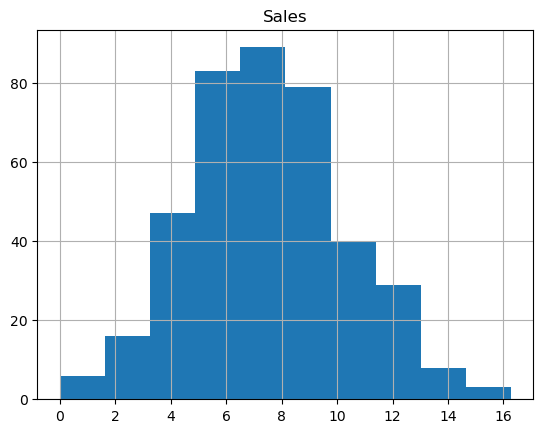

In [7]:
#plotting histogram for sales data
data.hist('Sales')

In [8]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
16.27000/2

8.135

In [10]:
8.135/2

4.0675

# Since sales is normally distributed we can take mean as threshold and make two categories >7.5 as high =1,7.5 as low = 0

In [11]:
#converting our sales data to categorical column
data1 = data.copy()
data1['Sales_cat'] = pd.cut(x = data['Sales'],bins = [0,7.5,17],labels = ['low','high'],right = False)
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low


In [12]:
#checking with sales_cat value counts
data1.Sales_cat.value_counts()

low     201
high    199
Name: Sales_cat, dtype: int64

In [13]:
#converting Urban to unique value where no = 0 and yes = 1
label_encoder = preprocessing.LabelEncoder()
data1['Urban'] = label_encoder.fit_transform(data1['Urban'])

In [14]:
#converting us to unique value where no = 0 and yes = 1
label_encoder = preprocessing.LabelEncoder()
data1['US'] = label_encoder.fit_transform(data1['US'])

In [15]:
#converting shelveloc to unique value where bad = 0 and good = 1 medium = 2
label_encoder = preprocessing.LabelEncoder()
data1['ShelveLoc'] = label_encoder.fit_transform(data1['ShelveLoc'])

In [16]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low


In [17]:
#dropping original sales feature
data2 = data1.drop(['Sales'],axis = 1)
data2.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,0,42,17,1,1,high
1,111,48,16,260,83,1,65,10,1,1,high
2,113,35,10,269,80,2,59,12,1,1,high
3,117,100,4,466,97,2,55,14,1,1,low
4,141,64,3,340,128,0,38,13,1,0,low


<AxesSubplot:>

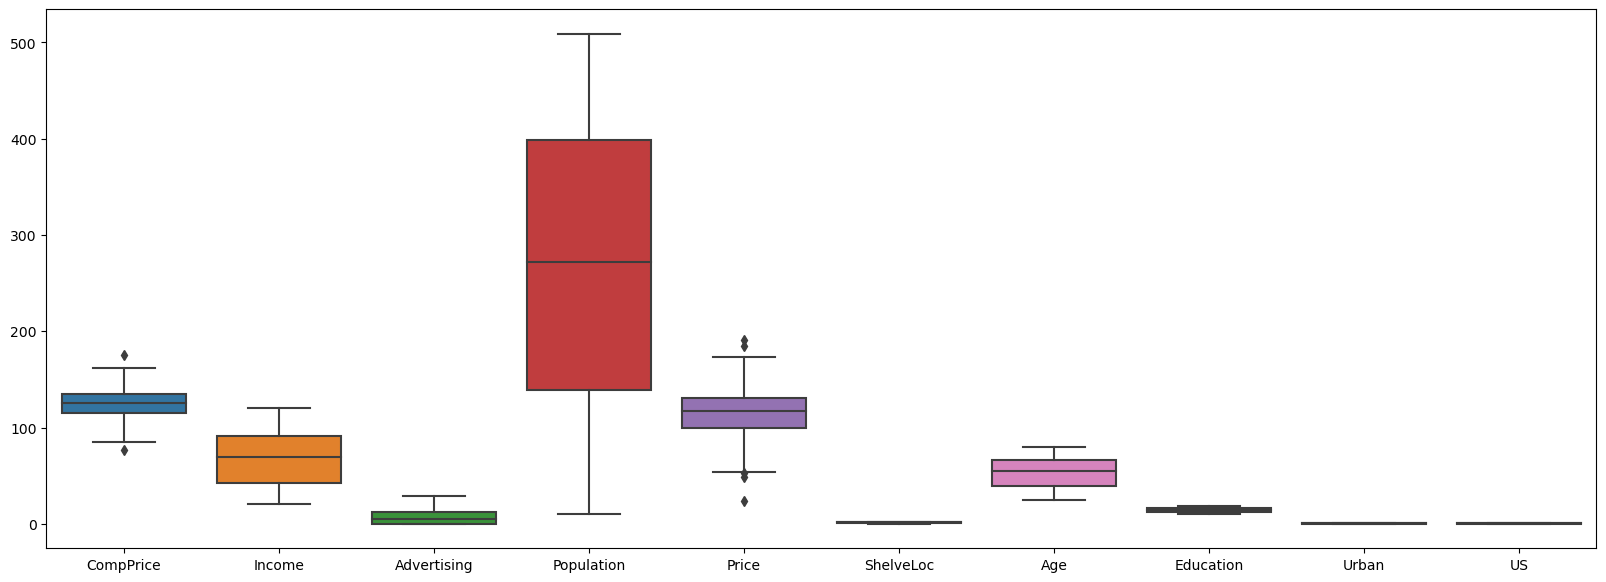

In [18]:
#checking for any outliers
plt.figure(figsize=(20,7))
sns.boxplot(data = data2)

In [19]:
data2.shape

(400, 11)

In [20]:
#transforming our sales category to category
data2['Sales_cat'] = data2['Sales_cat'].astype('category')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CompPrice    400 non-null    int64   
 1   Income       400 non-null    int64   
 2   Advertising  400 non-null    int64   
 3   Population   400 non-null    int64   
 4   Price        400 non-null    int64   
 5   ShelveLoc    400 non-null    int32   
 6   Age          400 non-null    int64   
 7   Education    400 non-null    int64   
 8   Urban        400 non-null    int32   
 9   US           400 non-null    int32   
 10  Sales_cat    400 non-null    category
dtypes: category(1), int32(3), int64(7)
memory usage: 27.2 KB


In [21]:
#checking with sales_cat value counts
data2.Sales_cat.value_counts()

low     201
high    199
Name: Sales_cat, dtype: int64

In [22]:
data2.corr()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085
US,0.016869,0.089601,0.684460,0.060564,0.057861,-0.039760,0.008652,-0.078250,0.047085,1.000000


In [23]:
#splitting our data
x = data2.iloc[:,0:10]
y = data2['Sales_cat']

In [24]:
#splitting our data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [25]:
param_grid = {'max_features':['auto','sqrt','log2','None'],
             'ccp_alpha':[0.1,.01,.001],
             'max_depth':[3,4,5,6,7,8],
             'criterion':['gini','entropy']
             }
#fitting our model with gridsearch cv
model1 =DecisionTreeClassifier(random_state = 0)
grid_search = GridSearchCV(estimator= model1,param_grid= param_grid,cv= 5, verbose = True)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\lalkr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lalkr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lalkr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\lalkr\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 281, in fit
    raise ValueError(
ValueError: Invalid value for max_features. Allowed string values are 'auto', 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2', 'None']},
             verbose=True)

In [26]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=7, max_features='auto',
                       random_state=0)

In [27]:
grid_search.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto'}

# Building our final Decision Tree using criterion entropy

In [28]:
#finalizing the tree with given parameters

model2 = DecisionTreeClassifier(ccp_alpha = 0.01,criterion = 'gini',max_depth = 7,random_state=0,max_features='auto')
model2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=7, max_features='auto',
                       random_state=0)

[Text(0.5, 0.9166666666666666, 'X[6] <= 74.5\ngini = 0.499\nsamples = 300\nvalue = [145, 155]'),
 Text(0.3333333333333333, 0.75, 'X[5] <= 0.5\ngini = 0.499\nsamples = 267\nvalue = [139, 128]'),
 Text(0.16666666666666666, 0.5833333333333334, 'gini = 0.351\nsamples = 66\nvalue = [15, 51]'),
 Text(0.5, 0.5833333333333334, 'X[5] <= 1.5\ngini = 0.473\nsamples = 201\nvalue = [124, 77]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.266\nsamples = 57\nvalue = [48, 9]'),
 Text(0.6666666666666666, 0.4166666666666667, 'X[1] <= 57.5\ngini = 0.498\nsamples = 144\nvalue = [76, 68]'),
 Text(0.5, 0.25, 'X[4] <= 100.5\ngini = 0.475\nsamples = 54\nvalue = [21, 33]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.6666666666666666, 0.08333333333333333, 'gini = 0.391\nsamples = 45\nvalue = [12, 33]'),
 Text(0.8333333333333334, 0.25, 'gini = 0.475\nsamples = 90\nvalue = [55, 35]'),
 Text(0.6666666666666666, 0.75, 'gini = 0.298\nsamples = 33\nv

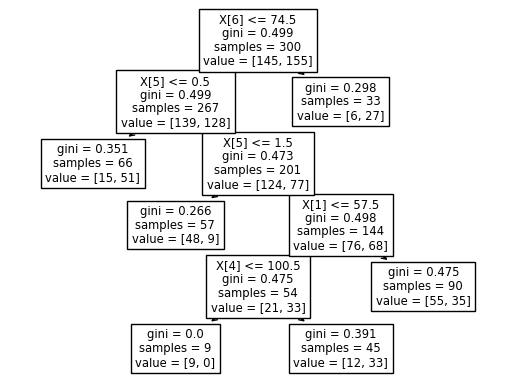

In [29]:
#plot the decision tree
tree.plot_tree(model2)

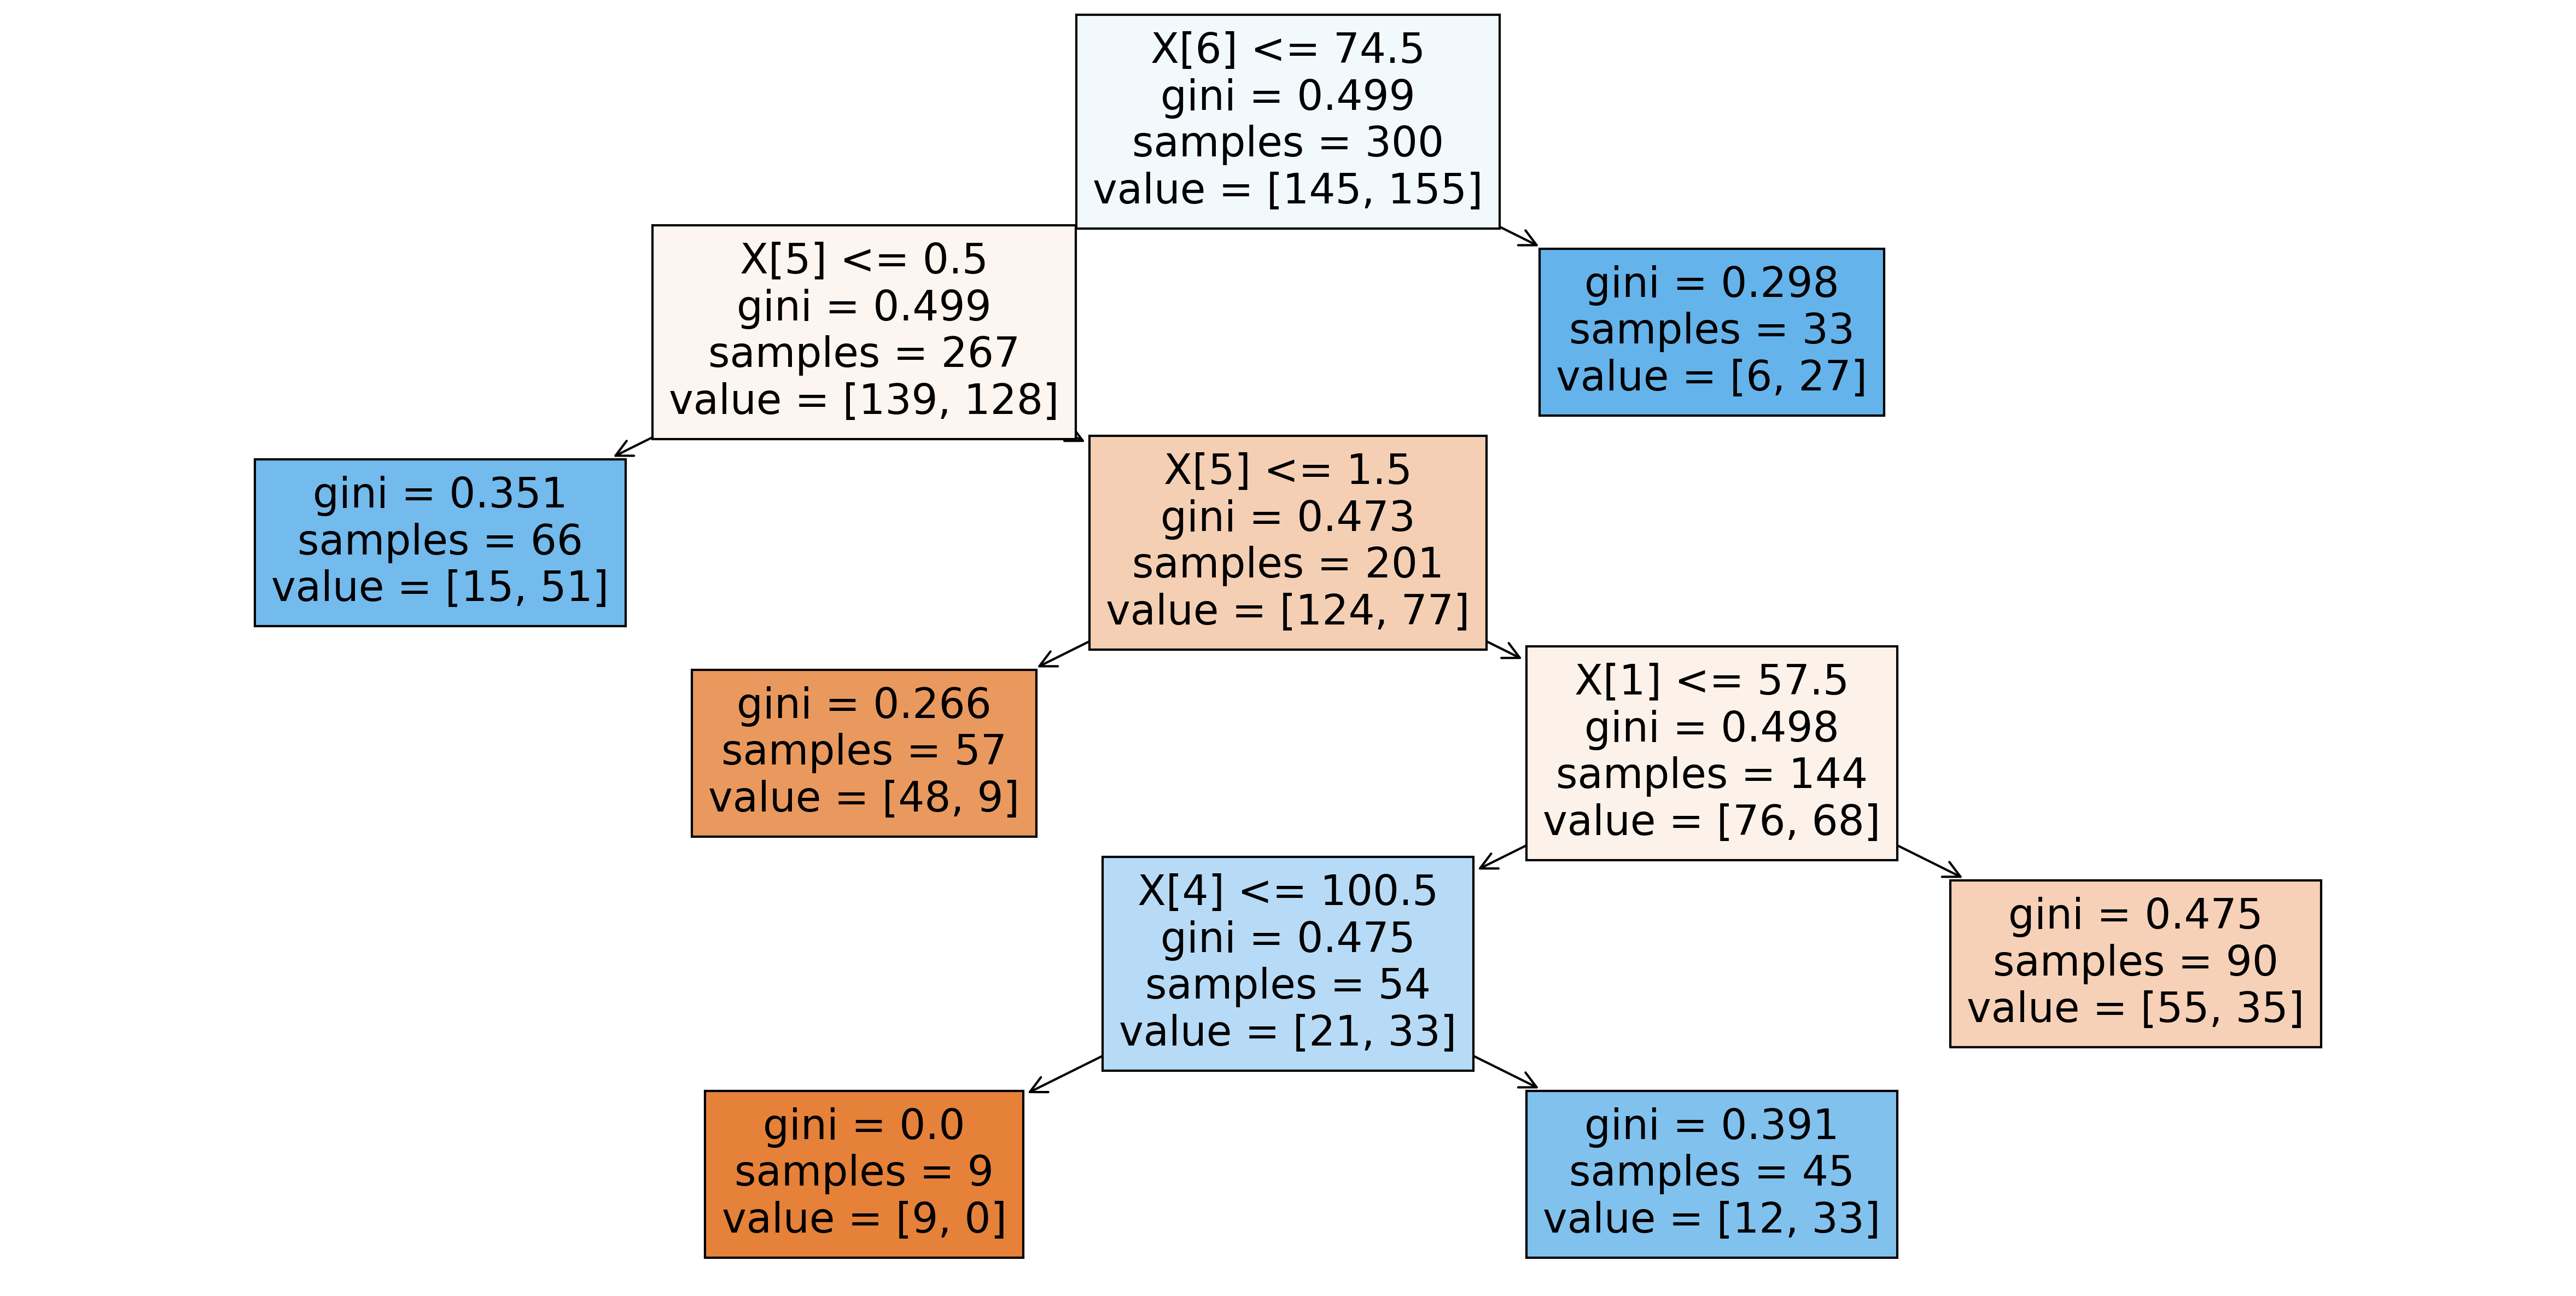

In [30]:
plt.figure(figsize=(20,10),dpi = 300)
tree.plot_tree(model2,filled = True)
plt.show()

In [31]:
print(tree.export_text(model2))

|--- feature_6 <= 74.50
|   |--- feature_5 <= 0.50
|   |   |--- class: low
|   |--- feature_5 >  0.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- class: high
|   |   |--- feature_5 >  1.50
|   |   |   |--- feature_1 <= 57.50
|   |   |   |   |--- feature_4 <= 100.50
|   |   |   |   |   |--- class: high
|   |   |   |   |--- feature_4 >  100.50
|   |   |   |   |   |--- class: low
|   |   |   |--- feature_1 >  57.50
|   |   |   |   |--- class: high
|--- feature_6 >  74.50
|   |--- class: low



In [32]:
#predicting on test data
preds = model2.predict(x_test)
pd.Series(preds).value_counts()

high    55
low     45
dtype: int64

In [33]:
preds

array(['high', 'low', 'high', 'low', 'low', 'low', 'high', 'low', 'low',
       'high', 'low', 'low', 'low', 'high', 'low', 'low', 'high', 'high',
       'low', 'high', 'high', 'low', 'high', 'high', 'high', 'high',
       'low', 'low', 'high', 'high', 'low', 'high', 'low', 'low', 'low',
       'high', 'low', 'high', 'low', 'high', 'low', 'high', 'high',
       'high', 'low', 'low', 'low', 'low', 'high', 'high', 'low', 'high',
       'high', 'low', 'low', 'high', 'low', 'low', 'high', 'low', 'high',
       'high', 'low', 'low', 'high', 'high', 'high', 'low', 'high',
       'high', 'high', 'low', 'high', 'high', 'high', 'high', 'high',
       'high', 'low', 'high', 'low', 'high', 'high', 'low', 'high',
       'high', 'low', 'low', 'high', 'high', 'high', 'low', 'high', 'low',
       'low', 'low', 'high', 'high', 'high', 'high'], dtype=object)

In [34]:
#getting 2 way table to understand correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,high,low
Sales_cat,,
low,16,30
high,39,15


In [35]:
accuracy_score(y_test,preds)

0.69

# Puring process to improve accuracy

In [36]:
#using complexity puring path checkinh for impurities and alphas
path = model2.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities = path.ccp_alphas,path.impurities

In [37]:
ccp_alphas

array([0.        , 0.00119658, 0.00178836, 0.00355556, 0.00405797,
       0.00412698, 0.00432299, 0.00443223, 0.00444444, 0.00544444,
       0.00557359, 0.005671  , 0.0062963 , 0.00634391, 0.00738462,
       0.00821023, 0.00875569, 0.00978271, 0.019     , 0.02689768,
       0.0363806 ])

In [39]:
models = []
for ccp_alpha in ccp_alphas:
    model2 = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    model2.fit(x_train,y_train)
    models.append(model2)
    print("no of nodes in last tree is: {} with ccp_alphas: {}".format
         (models[-1].tree_.node_count,ccp_alphas[-1]))

no of nodes in last tree is: 103 with ccp_alphas: 0.03638059701492535
no of nodes in last tree is: 103 with ccp_alphas: 0.03638059701492535
no of nodes in last tree is: 103 with ccp_alphas: 0.03638059701492535
no of nodes in last tree is: 79 with ccp_alphas: 0.03638059701492535
no of nodes in last tree is: 75 with ccp_alphas: 0.03638059701492535
no of nodes in last tree is: 75 with ccp_alphas: 0.03638059701492535
no of nodes in last tree is: 75 with ccp_alphas: 0.03638059701492535
no of nodes in last tree is: 75 with ccp_alphas: 0.03638059701492535
no of nodes in last tree is: 75 with ccp_alphas: 0.03638059701492535
no of nodes in last tree is: 61 with ccp_alphas: 0.03638059701492535
no of nodes in last tree is: 53 with ccp_alphas: 0.03638059701492535
no of nodes in last tree is: 53 with ccp_alphas: 0.03638059701492535
no of nodes in last tree is: 41 with ccp_alphas: 0.03638059701492535
no of nodes in last tree is: 41 with ccp_alphas: 0.03638059701492535
no of nodes in last tree is: 39

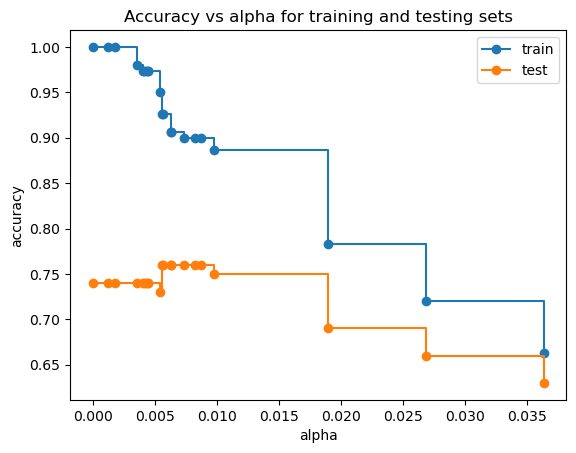

In [41]:
#plotting for accuracy vs alpha for training and test 
train_scores = [model2.score(x_train, y_train) for model2 in models]
test_scores = [model2.score(x_test, y_test) for model2 in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

model3 = DecisionTreeClassifier(random_state=0,ccp_alpha=0.012)
model3.fit(x_train,y_train)

In [44]:
pred= model3.predict(x_test)
accuracy_score(y_test,pred)

0.75

[Text(0.5, 0.9375, 'X[4] <= 105.5\ngini = 0.499\nsamples = 300\nvalue = [145, 155]'),
 Text(0.3125, 0.8125, 'X[6] <= 64.0\ngini = 0.407\nsamples = 102\nvalue = [73, 29]'),
 Text(0.1875, 0.6875, 'X[0] <= 118.5\ngini = 0.293\nsamples = 73\nvalue = [60, 13]'),
 Text(0.125, 0.5625, 'X[8] <= 0.5\ngini = 0.433\nsamples = 41\nvalue = [28, 13]'),
 Text(0.0625, 0.4375, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.1875, 0.4375, 'X[4] <= 86.5\ngini = 0.497\nsamples = 28\nvalue = [15, 13]'),
 Text(0.125, 0.3125, 'gini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.25, 0.3125, 'gini = 0.415\nsamples = 17\nvalue = [5, 12]'),
 Text(0.25, 0.5625, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.4375, 0.6875, 'X[4] <= 80.0\ngini = 0.495\nsamples = 29\nvalue = [13, 16]'),
 Text(0.375, 0.5625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.5625, 'gini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.6875, 0.8125, 'X[5] <= 0.5\ngini = 0.463\nsamples = 198\nvalue = [72, 126]'),


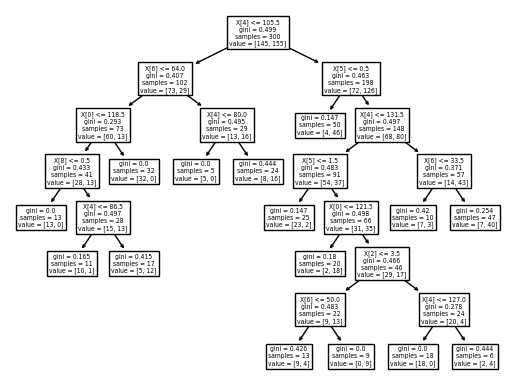

In [45]:
tree.plot_tree(model3)

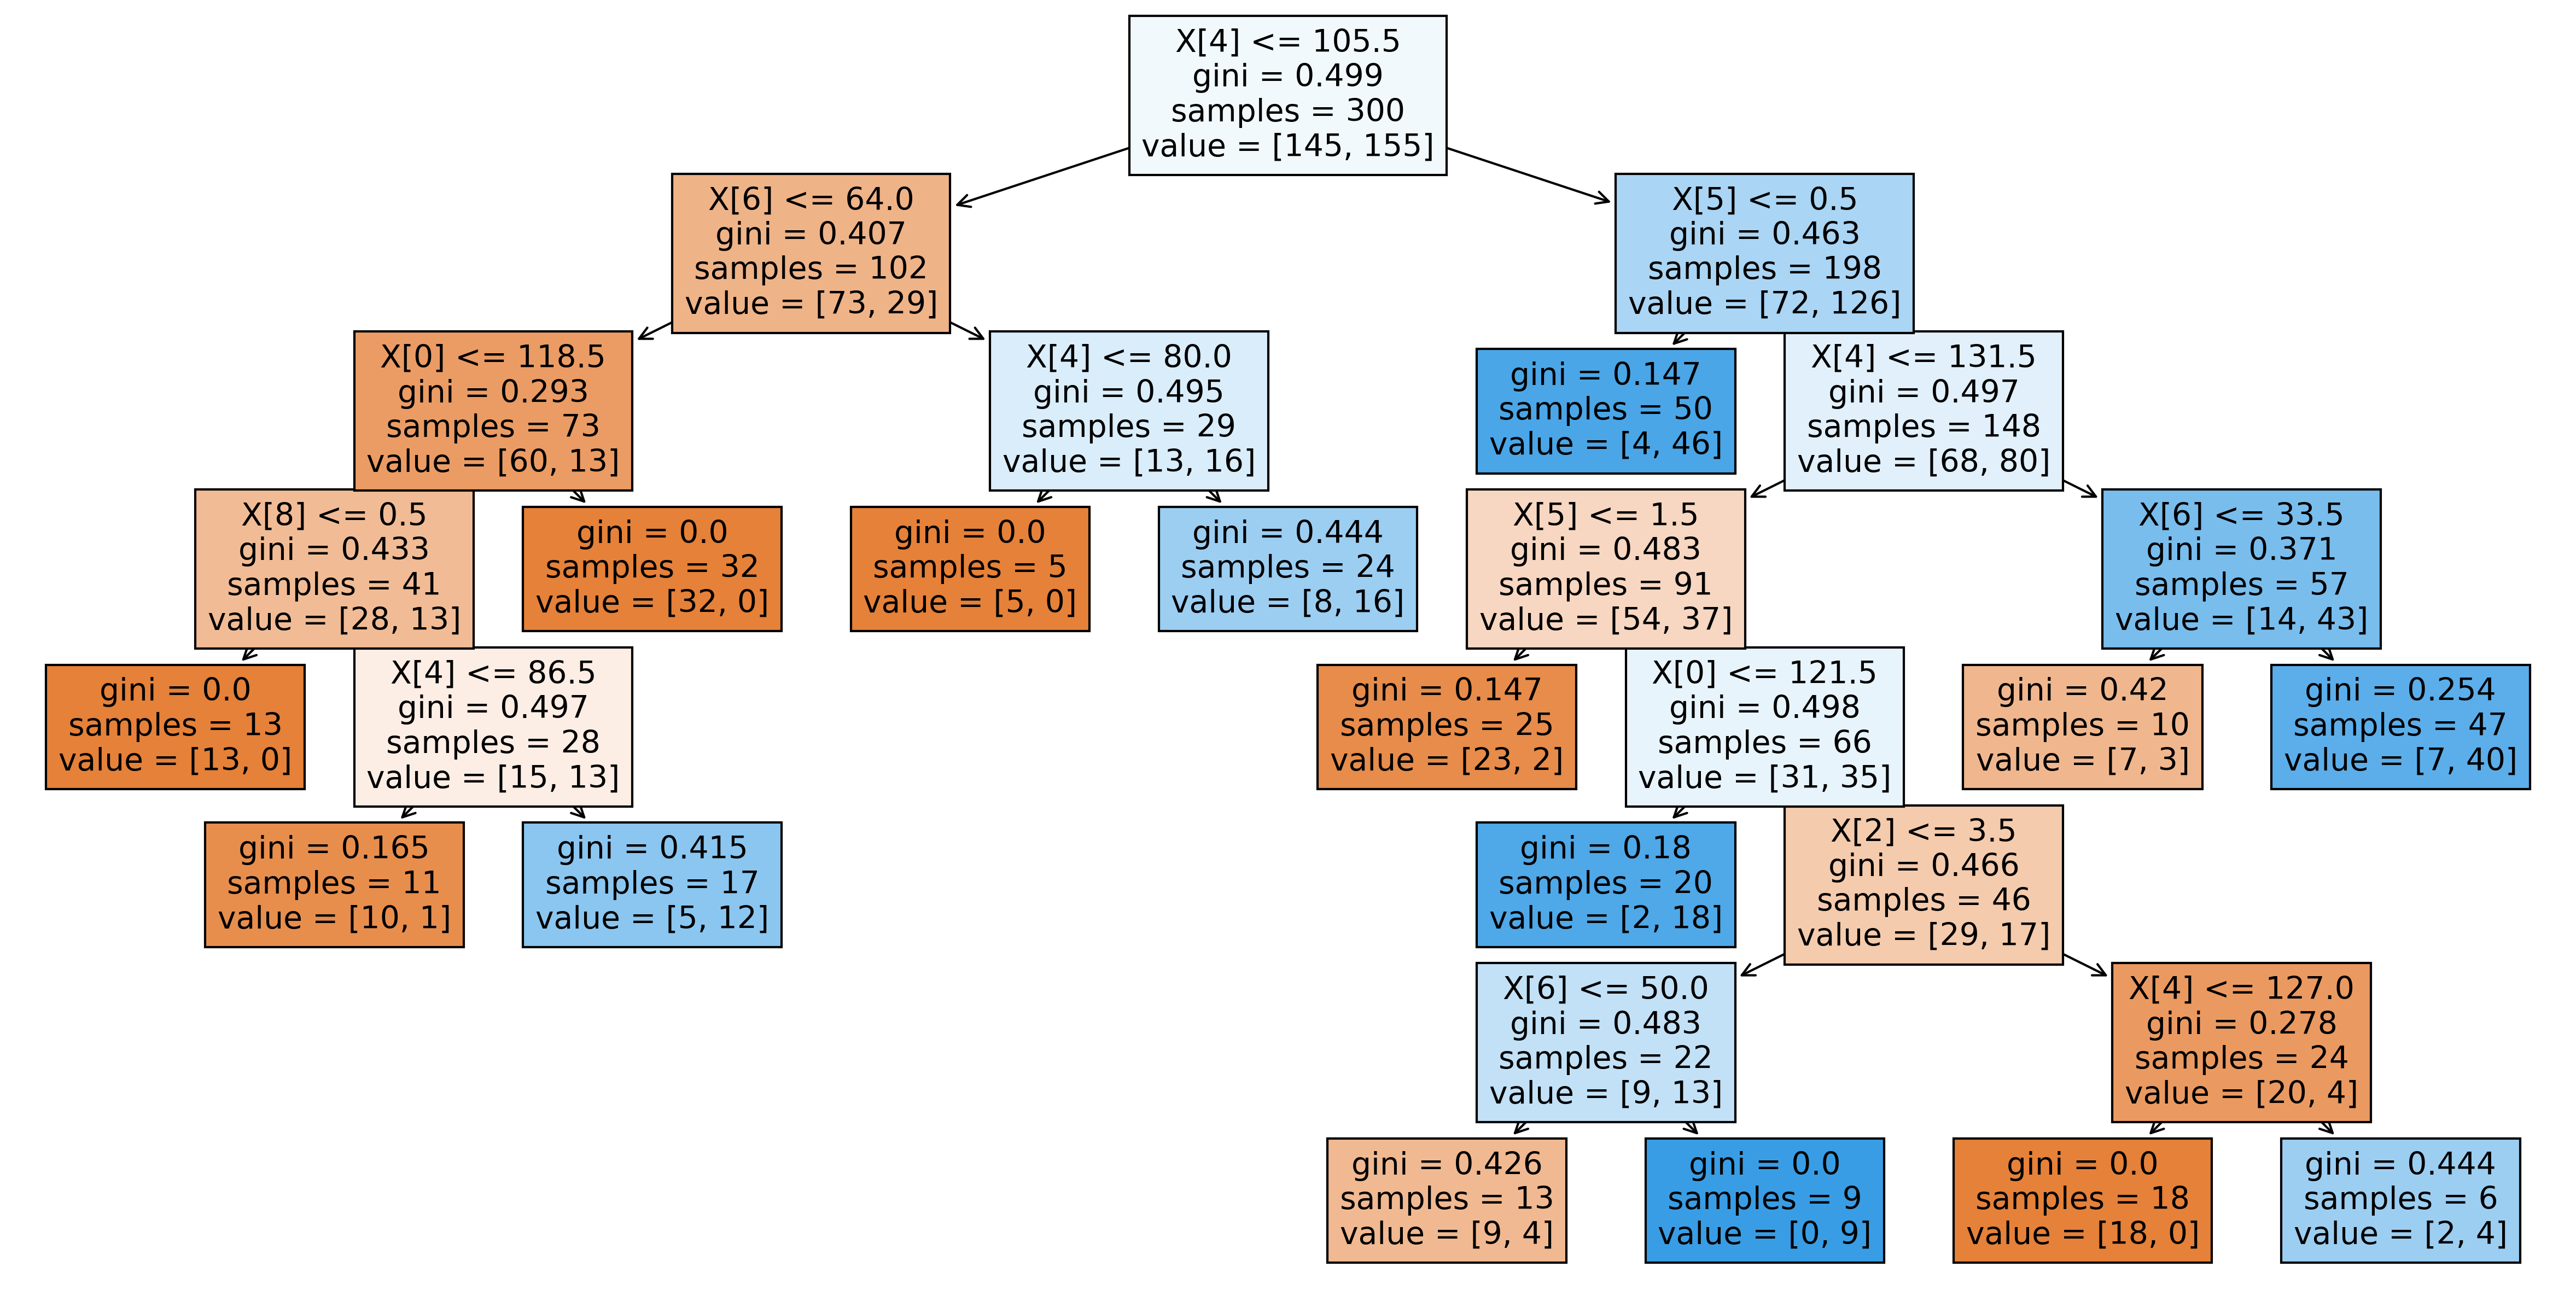

In [46]:
plt.figure(figsize=(20,10),dpi= 300)
tree.plot_tree(model3,filled = True)
plt.show()

# after pruning we can see our accuracy has increased but our tree is overfitting by adding more depths so we go with our previous alpha 0.01

In [47]:
final_model = DecisionTreeClassifier(ccp_alpha=0.01,criterion='gini',max_depth=7,random_state=0,max_features='auto')

final_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=7, max_features='auto',
                       random_state=0)

[Text(0.5, 0.9166666666666666, 'X[6] <= 74.5\ngini = 0.499\nsamples = 300\nvalue = [145, 155]'),
 Text(0.3333333333333333, 0.75, 'X[5] <= 0.5\ngini = 0.499\nsamples = 267\nvalue = [139, 128]'),
 Text(0.16666666666666666, 0.5833333333333334, 'gini = 0.351\nsamples = 66\nvalue = [15, 51]'),
 Text(0.5, 0.5833333333333334, 'X[5] <= 1.5\ngini = 0.473\nsamples = 201\nvalue = [124, 77]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.266\nsamples = 57\nvalue = [48, 9]'),
 Text(0.6666666666666666, 0.4166666666666667, 'X[1] <= 57.5\ngini = 0.498\nsamples = 144\nvalue = [76, 68]'),
 Text(0.5, 0.25, 'X[4] <= 100.5\ngini = 0.475\nsamples = 54\nvalue = [21, 33]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.6666666666666666, 0.08333333333333333, 'gini = 0.391\nsamples = 45\nvalue = [12, 33]'),
 Text(0.8333333333333334, 0.25, 'gini = 0.475\nsamples = 90\nvalue = [55, 35]'),
 Text(0.6666666666666666, 0.75, 'gini = 0.298\nsamples = 33\nv

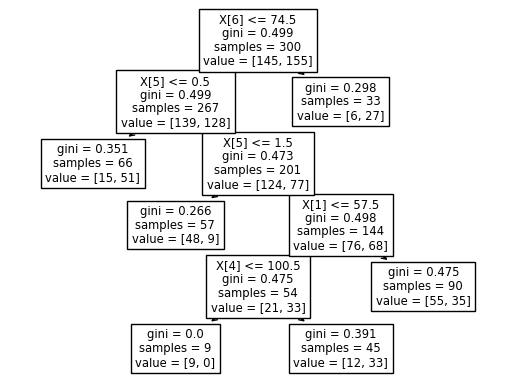

In [48]:
tree.plot_tree(final_model)

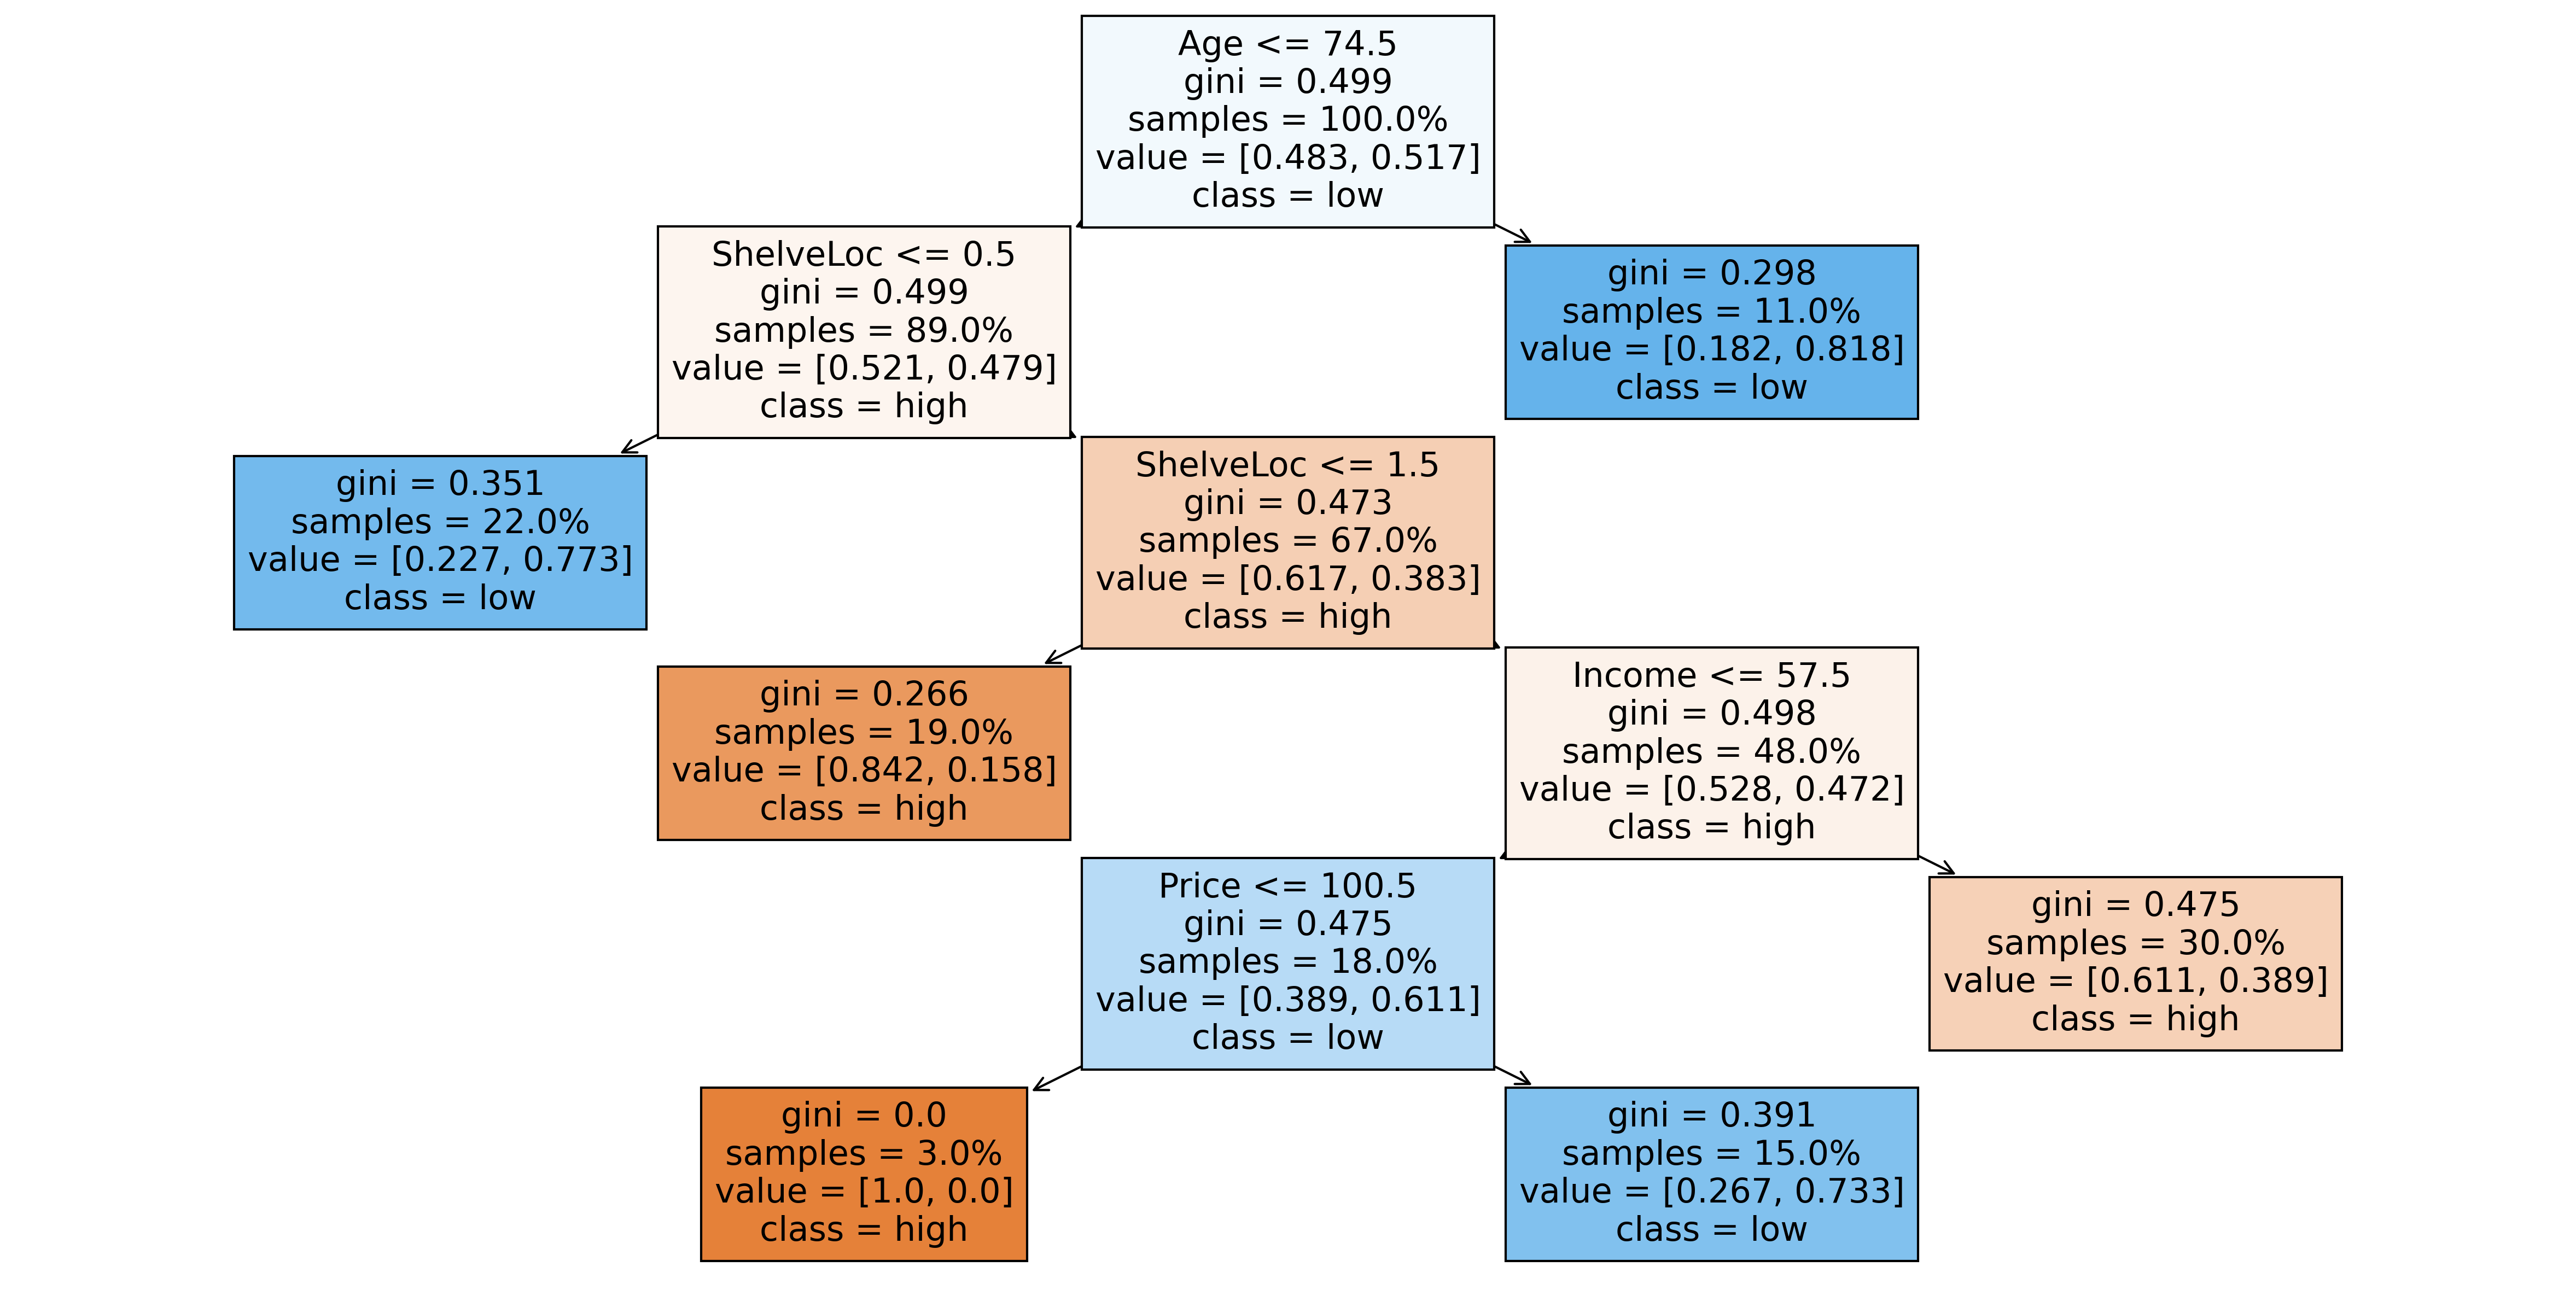

In [49]:
#plotting the tree for feature predicting high sales, S = high sales 
plt.figure(figsize=(20,10),dpi= 300)
tree.plot_tree(final_model,filled = True,
              feature_names= ['CompPrice' , 'Income' , 'Advertising',  'Population',  
                              'Price',  'ShelveLoc' , 'Age' , 'Education' , 'Urban' , 'US'],
              class_names=['high','low'],proportion= True,impurity= True)
plt.show()